# **importing**

In [ ]:
!pip install pandas #installing frameworks
!pip install scikit-learn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
df=pd.read_csv('/content/PS_20174392719_1491204439457_log.csv',on_bad_lines='skip')
print(df)

         step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0           1   PAYMENT   9839.64  C1231006815      170136.00       160296.36   
1           1   PAYMENT   1864.28  C1666544295       21249.00        19384.72   
2           1  TRANSFER    181.00  C1305486145         181.00            0.00   
3           1  CASH_OUT    181.00   C840083671         181.00            0.00   
4           1   PAYMENT  11668.14  C2048537720       41554.00        29885.86   
...       ...       ...       ...          ...            ...             ...   
2385739   201  TRANSFER 383651.14   C166603012      197035.00            0.00   
2385740   201  CASH_OUT 281057.94   C708845328        1174.00            0.00   
2385741   201   PAYMENT   8779.42  C1258224443       50398.00        41618.58   
2385742   201   PAYMENT   2135.47  C2082994053      828076.00       825940.53   
2385743   201       NaN       NaN          NaN            NaN             NaN   

            nameDest  oldba

In [ ]:
#check first 5 values
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0.00,0.00
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0.00,0.00
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1.00,0.00
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1.00,0.00
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0.00,0.00


In [ ]:
#check last 5 values
df.tail(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2385739,201,TRANSFER,383651.14,C166603012,197035.00,0.00,C320455725,6149.41,389800.55,0.00,0.00
2385740,201,CASH_OUT,281057.94,C708845328,1174.00,0.00,C1216945711,43245.47,324303.41,0.00,0.00
2385741,201,PAYMENT,8779.42,C1258224443,50398.00,41618.58,M75061255,0.00,0.00,0.00,0.00
2385742,201,PAYMENT,2135.47,C2082994053,828076.00,825940.53,M1446367118,0.00,0.00,0.00,0.00
2385743,201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.describe()#it used to show summary of statistics

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,2385744.00,2385743.00,2385743.00,2385743.00,2385743.00,2385743.00,2385743.00,2385743.00
mean,101.05,159394.23,852116.84,873523.07,995818.52,1108778.65,0.00,0.00
std,68.32,267119.24,2924538.54,2960854.91,2303036.28,2390961.68,0.03,0.00
min,1.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00
25%,33.00,12788.42,0.00,0.00,0.00,0.00,0.00,0.00
50%,132.00,77415.76,14885.00,0.00,138236.27,226932.81,0.00,0.00
75%,162.00,214438.55,117791.00,158909.69,947555.53,1142737.47,0.00,0.00
max,201.00,10000000.00,38939424.03,38946233.02,42283775.08,42655769.20,1.00,0.00


In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)# it used to specify and display values in float
print(df.describe())

           step      amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
count 219765.00   219765.00      219765.00       219764.00       219764.00   
mean      10.33   180808.44      882507.13       900384.73       949738.33   
std        2.19   325429.86     2794302.56      2831587.95      2369067.16   
min        1.00        0.30           0.00            0.00            0.00   
25%        9.00    12297.06           0.00            0.00            0.00   
50%       11.00    70830.43       19521.00            0.00        55258.30   
75%       12.00   230617.00      193259.62       229443.87       788900.13   
max       14.00 10000000.00    38939424.03     38946233.02     39039582.05   

       newbalanceDest   isFraud  isFlaggedFraud  
count       219764.00 219764.00       219764.00  
mean       1189618.50      0.00            0.00  
std        2633399.52      0.03            0.00  
min              0.00      0.00            0.00  
25%              0.00      0.00            0.00

# **checking missing values**

In [ ]:
df.isnull()#it's check missing values if false(no) if yes(true)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
219760,False,False,False,False,False,False,False,False,False,False,False
219761,False,False,False,False,False,False,False,False,False,False,False
219762,False,False,False,False,False,False,False,False,False,False,False
219763,False,False,False,False,False,False,False,False,False,False,False


**checking
 missing values**

In [ ]:
df.isnull().sum()#sum here used to display how many missing values

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,1
nameDest,1
oldbalanceDest,1
newbalanceDest,1
isFraud,1


# **filling missing values**


In [ ]:
#replacing missing value
df['amount'] = df['amount'].fillna(df['amount'].median())
df['oldbalanceOrg']=df['oldbalanceOrg'].fillna(df['oldbalanceOrg'].median())
df['newbalanceOrig']=df['newbalanceOrig'].fillna(df['newbalanceOrig'].median())
df['type']=df['type'].fillna(df['type'].mode()[0])
df['nameOrig']=df['nameOrig'].fillna(df['nameOrig'].mode()[0])
df['isFraud']=df['isFraud'].fillna(df['isFraud'].mode()[0])

In [ ]:
df.head(1)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0.00,0.00


In [ ]:
df.shape

(219764, 11)

# **Equalizing rows**

In [ ]:

df['newbalanceOrig'] = df['oldbalanceOrg'] - df['amount']# iam calculating new balance will be old balance-amount
df.loc[df['newbalanceOrig'] < 0, 'newbalanceOrig'] = df['oldbalanceOrg']# df.loc here helps that newb should not less than 0
df.loc[df['type'].isin(['TRANSFER', 'CASH_OUT']), 'newbalanceDest'] =df['oldbalanceDest'] + df['amount']
df.loc[df['newbalanceDest'] < 0, 'newbalanceDest'] = df['oldbalanceDest']
df.to_csv("corrected_file.csv", index=False)#all values stored in one file
print("Dataset corrected and saved as 'corrected_file.csv'")

Dataset corrected and saved as 'corrected_file.csv'


In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,219764.00,219764.00,219764.00,219764.00,219764.00,219764.00,219764.00,219764.00
mean,10.33,180809.08,882511.15,850006.90,949738.33,1097723.13,0.00,0.00
std,2.19,325430.46,2794308.29,2758204.49,2369067.16,2493880.08,0.03,0.00
min,1.00,0.30,0.00,0.00,0.00,0.00,0.00,0.00
25%,9.00,12296.88,0.00,0.00,0.00,0.00,0.00,0.00
50%,11.00,70830.49,19521.00,13932.60,55258.30,177035.49,0.00,0.00
75%,12.00,230617.01,193260.02,153248.20,788900.13,1044258.78,0.00,0.00
max,14.00,10000000.00,38939424.03,38932615.04,39039582.05,39042481.25,1.00,0.00


In [ ]:
df.head(1)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0.00,0.00


In [ ]:
df['isFraud'].sum()#how maany frauds or there

np.float64(155.0)

In [ ]:
df.head(1)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0.00,0.00


# **checking data types**

In [ ]:
a= df['type'].value_counts()# it helps to show how many transactions consists following
print(a)

type
CASH_OUT    848913
PAYMENT     798174
CASH_IN     525111
TRANSFER    197767
DEBIT        15778
Name: count, dtype: int64


In [ ]:
df['type'] = df['type'].replace('CASH_I', 'CASH_IN')

In [ ]:
print(a)

type
CASH_OUT    848913
PAYMENT     798174
CASH_IN     525111
TRANSFER    197767
DEBIT        15778
Name: count, dtype: int64


In [ ]:
print(df['type'].unique())# printing to know what are diff transaction types

['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


In [ ]:
print(df['isFraud'].unique())# isfraud  vales are 0(non-fraud) 0r 1(fraud)

[0. 1.]


In [ ]:
df['isFraud'].fillna(1)#if missing values filling with 1

,isFraud
0,0.00
1,0.00
2,1.00
3,1.00
4,0.00
...,...
2385738,0.00
2385739,0.00
2385740,0.00
2385741,0.00


In [ ]:
df.head(1)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0.00,0.00


In [ ]:
df['isFraud'].fillna(1)
df['isFlaggedFraud'].fillna(0)
print(df['isFraud'])

0         0.00
1         0.00
2         1.00
3         1.00
4         0.00
          ... 
2385738   0.00
2385739   0.00
2385740   0.00
2385741   0.00
2385742   0.00
Name: isFraud, Length: 2385743, dtype: float64


In [ ]:
df['isFraud'].isnull().sum()
df['isFlaggedFraud'].isnull().sum()#checking count of duplicates

np.int64(0)

In [ ]:
print(df.duplicated())

0          False
1          False
2          False
3          False
4          False
           ...  
2385738    False
2385739    False
2385740    False
2385741    False
2385742    False
Length: 2385743, dtype: bool


In [ ]:
df.info()# summary of columns

<class 'pandas.core.frame.DataFrame'>
Index: 165438 entries, 0 to 165437
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            165438 non-null  int64  
 1   type            165438 non-null  object 
 2   amount          165438 non-null  float64
 3   nameOrig        165438 non-null  object 
 4   oldbalanceOrg   165438 non-null  float64
 5   newbalanceOrig  165438 non-null  float64
 6   nameDest        165438 non-null  object 
 7   oldbalanceDest  165438 non-null  float64
 8   newbalanceDest  165438 non-null  float64
 9   isFraud         165438 non-null  float64
 10  isFlaggedFraud  165438 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 19.2+ MB


In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,165438.00,165438.00,165438.00,165438.00,165438.00,165438.00,165438.00,165438.00
mean,9.55,179350.47,886245.25,853948.18,922994.79,1077413.97,0.00,0.00
std,1.97,336032.65,2812183.59,2776318.14,2380861.61,2522704.22,0.03,0.00
min,1.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00
25%,9.00,11410.16,0.00,0.00,0.00,0.00,0.00,0.00
50%,10.00,63765.80,19511.00,13774.80,39565.90,146509.27,0.00,0.00
75%,11.00,224848.46,190112.30,151978.21,710659.90,976301.69,0.00,0.00
max,12.00,10000000.00,38939424.03,38932615.04,38946233.02,39039582.05,1.00,0.00


# **Data visualization**


# 📊 1️⃣ Histogram
understand the distribution of numerical data.

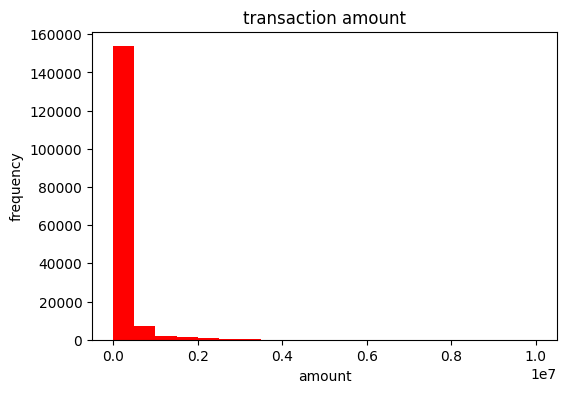

In [ ]:
# to check transaction amount
# Helps see how transaction amounts are spread and if fraud transactions have unusual amounts.
plt.figure(figsize=(6,4))
plt.hist(df['amount'],bins=20,color='red')
plt.xlabel('amount')
plt.ylabel('frequency')
plt.title('transaction amount')
plt.show()

# check With numerical data not with categorical data

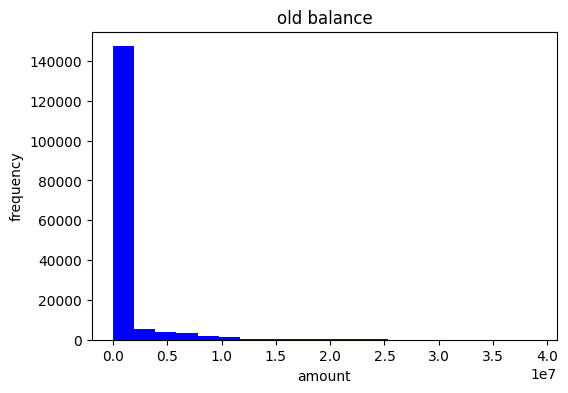

In [ ]:
#old balance org
plt.figure(figsize=(6,4))
plt.hist(df['oldbalanceOrg'],bins=20,color='blue')
plt.xlabel('amount')
plt.ylabel('frequency')
plt.title('old balance')
plt.show()

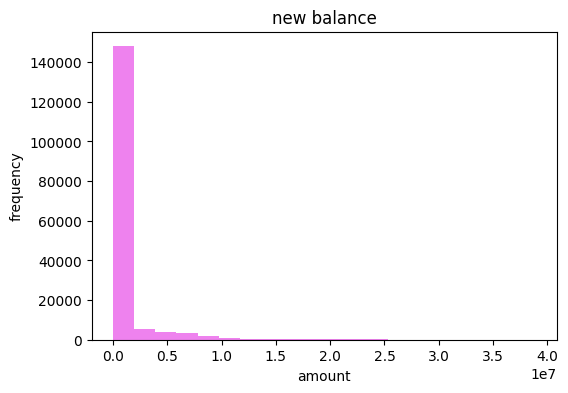

In [ ]:

#new balance org
plt.figure(figsize=(6,4))
plt.hist(df['newbalanceOrig'],bins=20,color='violet')
plt.xlabel('amount')
plt.ylabel('frequency')
plt.title('new balance')
plt.show()

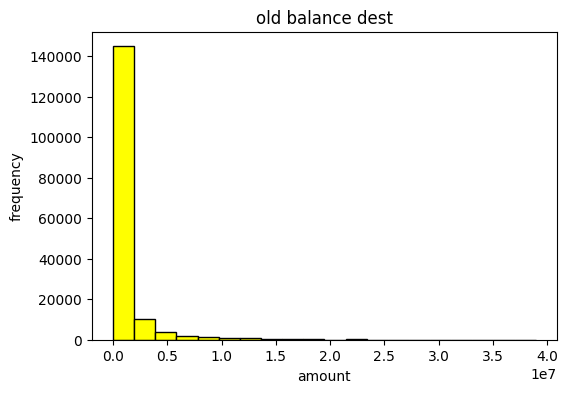

In [ ]:
#old balance dest
plt.figure(figsize=(6,4))
plt.hist(df['oldbalanceDest'],bins=20,color='yellow',edgecolor='black')
plt.xlabel('amount')
plt.ylabel('frequency')
plt.title('old balance dest')
plt.show()

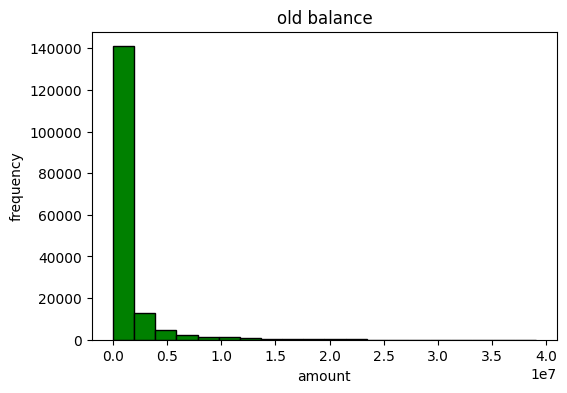

In [ ]:


#new balance dest
plt.figure(figsize=(6,4))
plt.hist(df['newbalanceDest'],bins=20,color='green',edgecolor='black')
plt.xlabel('amount')
plt.ylabel('frequency')
plt.title('old balance')
plt.show()

# **step2:box plot**
🚫A box plot is a graphical representation of data distribution that helps in detecting outliers.


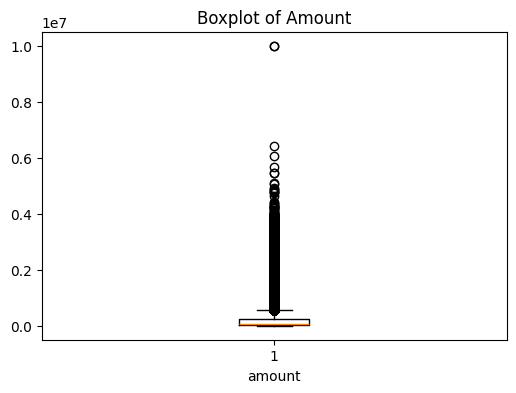

In [ ]:
#amount
plt.figure(figsize=(6,4))
plt.boxplot(df['amount'])
plt.xlabel('amount')
plt.title('Boxplot of Amount')
plt.show()

In [ ]:

#to check whether outliers should remove or to keep
print(df['amount'].max())
print(df['amount'].min())
print(df['amount'].describe())

10000000.0
0.32
count     165438.00
mean      179350.47
std       336032.65
min            0.32
25%        11410.16
50%        63765.80
75%       224848.46
max     10000000.00
Name: amount, dtype: float64


![image.png]()

# some are very high so check boundaries

In [ ]:
Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper= Q3 + 1.5 * IQR
outliers = df[(df['amount'] >= lower) & (df['amount'] <= upper)]

In [ ]:
fraud_outliers = outliers[outliers['isFraud'] == 1]
print(fraud_outliers[['amount', 'isFraud']].value_counts())

amount     isFraud
164.00     1.00       2
181.00     1.00       2
222.00     1.00       2
1055.00    1.00       2
1996.17    1.00       2
2100.00    1.00       2
2806.00    1.00       2
9217.19    1.00       2
10119.47   1.00       2
10224.00   1.00       2
10539.37   1.00       2
10565.00   1.00       2
11308.00   1.00       2
12461.00   1.00       2
13704.00   1.00       2
13707.11   1.00       2
14949.84   1.00       2
17246.00   1.00       2
17320.91   1.00       2
18627.02   1.00       2
19472.00   1.00       2
20128.00   1.00       2
21571.00   1.00       2
21729.00   1.00       2
21922.00   1.00       2
22877.00   1.00       2
25071.46   1.00       2
25975.86   1.00       2
26768.50   1.00       2
29707.86   1.00       2
30521.02   1.00       2
33332.86   1.00       2
35063.63   1.00       2
43092.00   1.00       2
59835.00   1.00       2
60726.57   1.00       2
85354.69   1.00       2
86070.17   1.00       2
89631.24   1.00       2
93810.76   1.00       2
120074.73  1.00      

In [ ]:
outlier = df[(df['amount'] > upper) | (df['amount'] < lower)]
fraudoutliers = outlier[outlier['isFraud'] == 1] # Get all transactions above the upper bound
print(outlier[['amount', 'isFraud']].value_counts())  # Count fraud and non-fraud outliers

amount      isFraud
1154353.99  1.00       2
1041647.06  1.00       2
2930418.44  1.00       2
963532.14   1.00       2
2662734.59  1.00       2
                      ..
722193.34   0.00       1
722391.72   0.00       1
722415.50   0.00       1
722575.18   0.00       1
721846.16   0.00       1
Name: count, Length: 10066, dtype: int64


![image.png]()

In [ ]:
#negative ignore it
outliers = df[(df['amount'] > upper) & (df['amount'] >= 0)]
print(len(outliers))
print(outliers[['amount', 'isFraud']].value_counts())

10078
amount      isFraud
1154353.99  1.00       2
1041647.06  1.00       2
2930418.44  1.00       2
963532.14   1.00       2
2662734.59  1.00       2
                      ..
722193.34   0.00       1
722391.72   0.00       1
722415.50   0.00       1
722575.18   0.00       1
721846.16   0.00       1
Name: count, Length: 10066, dtype: int64


In [ ]:

fraud_outliers = outliers[outliers['isFraud'] == 1]
non_fraud_outliers = outliers[outliers['isFraud'] == 0]
print(len(fraud_outliers))
print(len(non_fraud_outliers))

27
10051


In [ ]:

clean = df[(df['amount'] >= lower) & (df['amount'] <= upper)]
print(len(df))
print(len(clean))#data size reduced


165438
155360


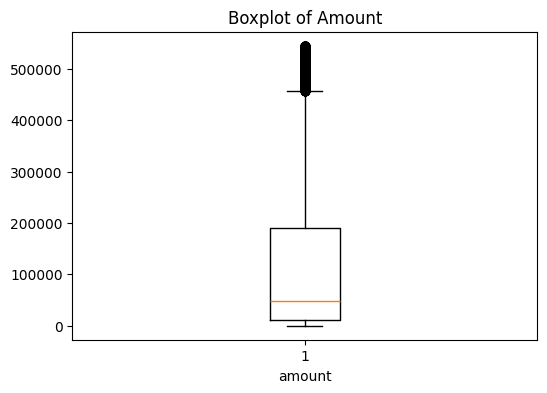

In [ ]:
plt.figure(figsize=(6,4))
plt.boxplot(clean['amount'])
plt.xlabel('amount')
plt.title('Boxplot of Amount')
plt.show()

# **Scatter plot**

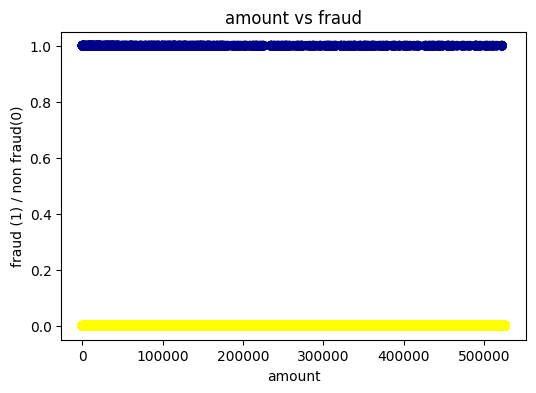

In [ ]:
#amount vs fraud
#to check how much amount as fraud
plt.figure(figsize=(6,4))
plt.scatter(clean['amount'],clean['isFraud'],c=clean['isFraud'].map({0: 'yellow', 1: 'darkblue'}))
plt.xlabel('amount')
plt.ylabel('fraud (1) / non fraud(0)')
plt.title('amount vs fraud')
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


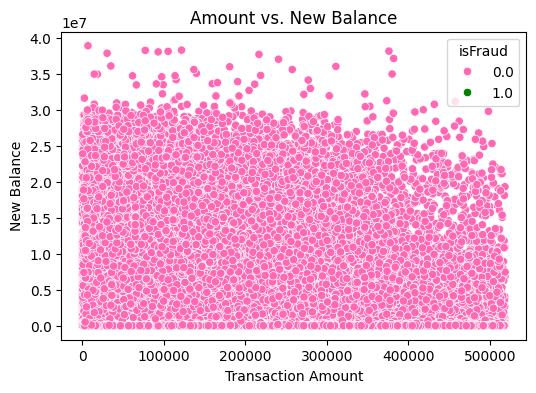

In [ ]:

#amount vs new balance
plt.figure(figsize=(6,4))
sns.scatterplot(x=clean['amount'], y=clean['newbalanceOrig'], hue=clean['isFraud'], palette={0:"hotpink",1:'green'})
plt.xlabel('Transaction Amount')
plt.ylabel('New Balance')
plt.title('Amount vs. New Balance')
plt.show()

In [ ]:
print(df[['amount', 'newbalanceOrig', 'oldbalanceOrg']].describe())

           amount  newbalanceOrig  oldbalanceOrg
count   586979.00       586979.00      586979.00
mean    160734.14       857329.42      888030.59
std     268269.96      2926096.04     2961299.63
min          0.10            0.00           0.00
25%      12326.56            0.00           0.00
50%      75383.91        12890.51       17803.00
75%     214827.10       125191.01      157235.08
max   10000000.00     38932615.04    38939424.03


✅ What does it show?

How much balance is left after a transaction for the sender (origin account).
Helps detect if fraudsters empty their accounts after fraudulent transactions.


In [ ]:
df.head(1)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0.00,0.00


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


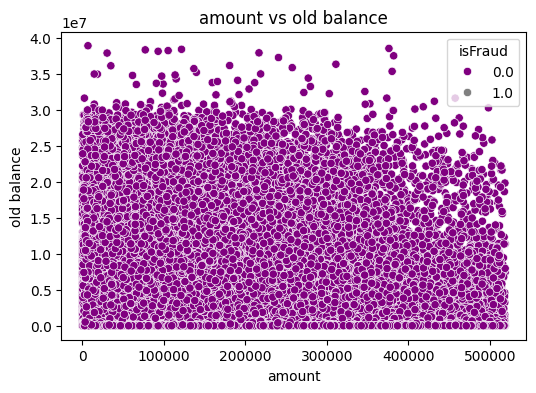

In [ ]:
#amount vs old balance orig
plt.figure(figsize=(6,4))
sns.scatterplot(x=clean['amount'],y=clean['oldbalanceOrg'],hue=clean['isFraud'],palette={0:'purple',1:'grey'})
plt.xlabel('amount')
plt.ylabel('old balance')
plt.title('amount vs old balance')
plt.show()

✅ If fraud transactions mostly cluster near oldbalanceOrig = 0, it means fraudsters start with little to no money.
✅ If fraud transactions happen across high balances, it may indicate fraudsters with large funds trying to hide fraudulent activity.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


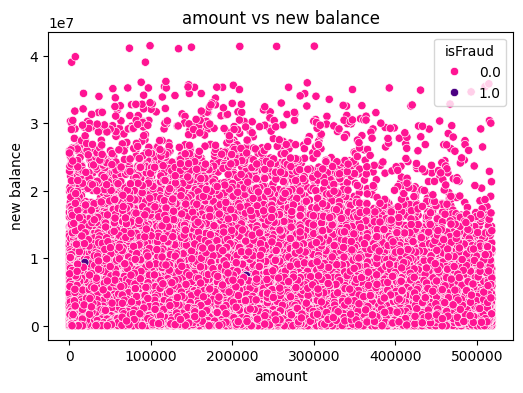

In [ ]:
#amount vs new balance dest
plt.figure(figsize=(6,4))
sns.scatterplot(x=clean['amount'],y=clean['newbalanceDest'],hue=clean['isFraud'],palette={0:'deeppink',1:'indigo'})
plt.xlabel('amount')
plt.ylabel('new balance')
plt.title('amount vs new balance')
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


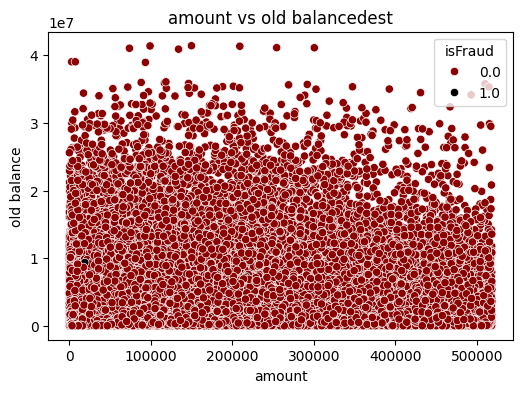

In [ ]:
#oldbalancedest
plt.figure(figsize=(6,4))
sns.scatterplot(x=clean['amount'],y=clean['oldbalanceDest'],hue=clean['isFraud'],palette={0:'darkred',1:'black'})
plt.xlabel('amount')
plt.ylabel('old balance')
plt.title('amount vs old balancedest')
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


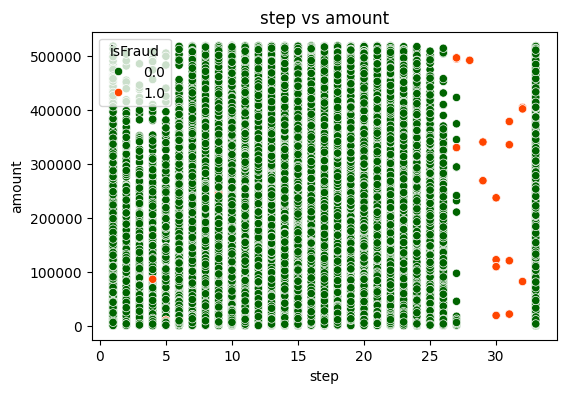

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=clean['step'],y=clean['amount'],hue=clean['isFraud'],palette={0:'darkgreen',1:'orangered'})
plt.xlabel('step')
plt.ylabel('amount')
plt.title('step vs amount')
plt.show()

\# **📊 Bar Charts in Data Visualization**


**🎯 Where to Use Bar Charts in Your PaySim Project?**
📌 Fraud vs. Non-Fraud Counts → To show how many transactions are fraud.
📌 Transaction Types → To compare different types of transactions.
📌 Fraud Rate by Transaction Type → To find the most fraud-prone transactions.



<ipython-input-52-636a80e72fe0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=clean['isFraud'].value_counts().index, y=clean['isFraud'].value_counts().values, palette=['blue', 'red'])


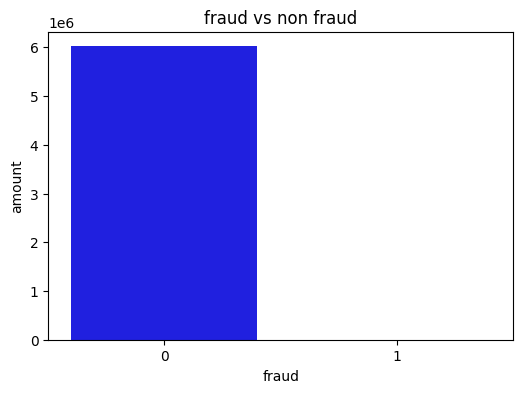

In [ ]:

plt.figure(figsize=(6,4))
sns.barplot(x=clean['isFraud'].value_counts().index, y=clean['isFraud'].value_counts().values, palette=['blue', 'red'])
plt.xlabel('fraud')
plt.ylabel('amount')
plt.title('fraud vs non fraud')
plt.show()

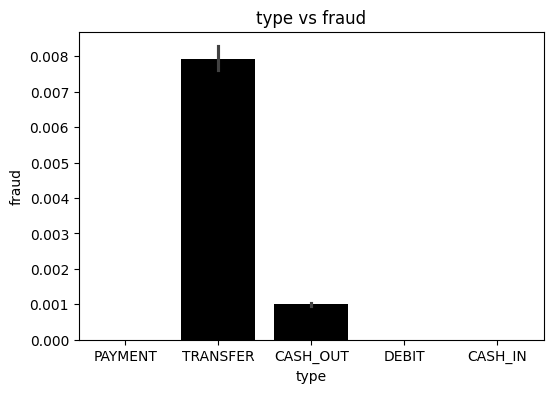

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x=clean['type'],y=clean['isFraud'],color='black')
plt.xlabel('type')
plt.ylabel('fraud')
plt.title('type vs fraud')
plt.show()

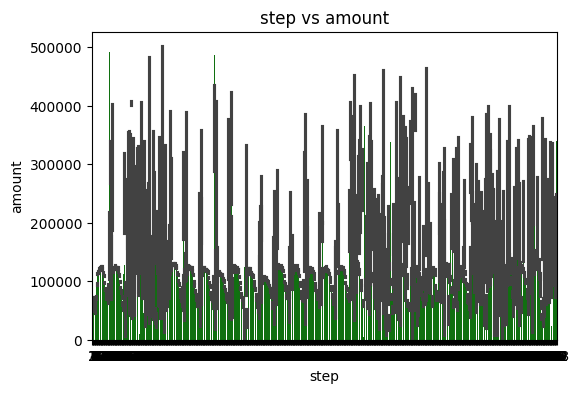

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x=clean['step'],y=clean['amount'],color='green')
plt.xlabel('step')
plt.ylabel('amount')
plt.title('step vs amount')
plt.show()

# **📌 Understanding Line Charts**
**📍 When to Use a Line Chart?**
✅ If you have time-based data (e.g., fraud cases per day, transactions over time)
✅ If you want to see trends or patterns (e.g., is fraud increasing or decreasing?)
✅ If you want to compare multiple trends (e.g., fraud vs non-fraud transactions over time)

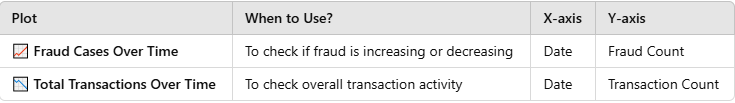

In [ ]:
#x axis....time based data
#y axis....numeric values like amount


In [ ]:
df.head(1)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0


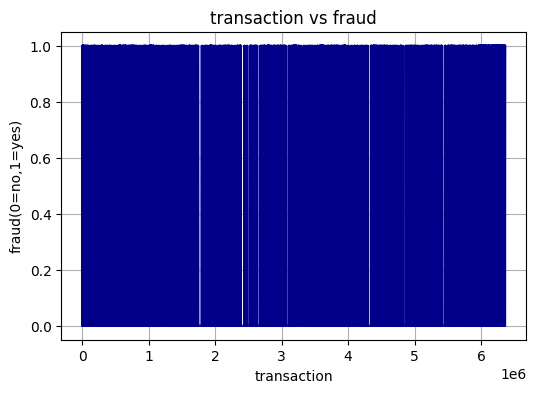

In [ ]:
#tansaction index vs fraud
plt.figure(figsize=(6,4))
sns.lineplot(x=clean.index,y=clean['isFraud'],color='darkblue')
plt.xlabel('transaction')
plt.ylabel('fraud(0=no,1=yes)')
plt.title('transaction vs fraud')
plt.grid(True)
plt.show()

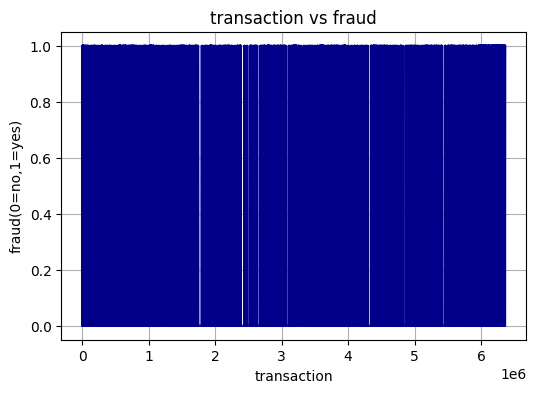

In [ ]:


#tansaction index vs fraud
plt.figure(figsize=(6,4))
sns.lineplot(x=clean.index,y=clean['isFraud'],color='darkblue')
plt.xlabel('transaction')
plt.ylabel('fraud(0=no,1=yes)')
plt.title('transaction vs fraud')
plt.grid(True)
plt.show()

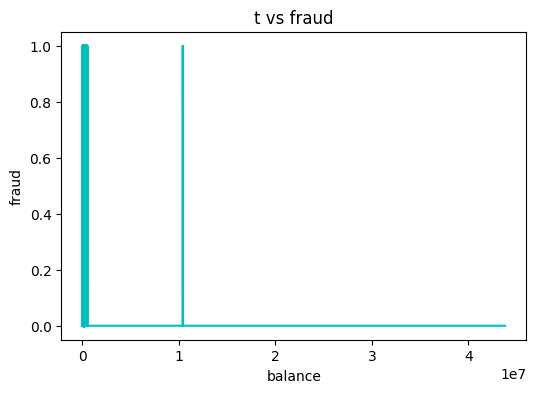

In [ ]:


#oldbalance vs fraud
plt.figure(figsize=(6,4))
sns.lineplot(x=clean['oldbalanceOrg'],y=clean['isFraud'],color='c')
plt.xlabel('balance')
plt.ylabel('fraud')
plt.title('t vs fraud')
plt.show()

# **📌 Pie Chart in Matplotlib**
A pie chart is used to represent proportions of different categories in a dataset. It helps in visualizing how a whole is divided into parts.

# 1️⃣ When to Use a Pie Chart?
✔ When you want to show the percentage/proportion of categories in a dataset.
✔ When the sum of all categories forms a meaningful whole (e.g., total transactions, total fraud cases, etc.).
✔ When there are few categories (Too many categories make it unreadable).



In [ ]:

clean.head(1)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0.00,0.00


In [ ]:
#doubt(later)

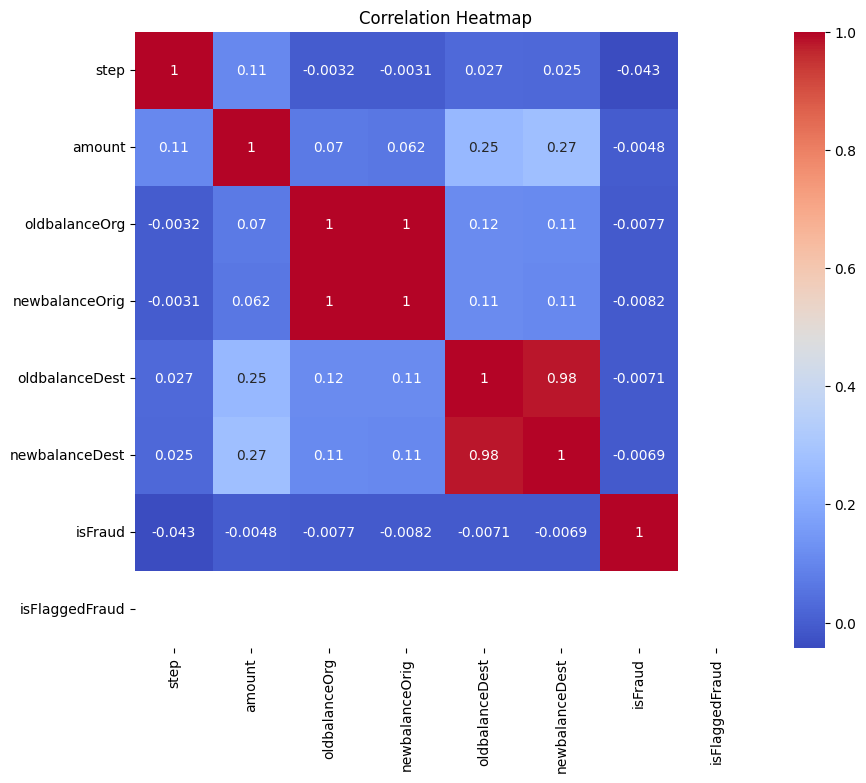

In [ ]:
numeric= clean.select_dtypes(include='number')
correlation = numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


# **✨ Data Preprocessing for PaySim Fraud Detection ML Project**


# **📌 Step 1:Feature Scaling **


#scaling is done to divide the large values into small values
it done by either normalization or by standardization

✅ In data preprocessing, we have two scaling methods:

1️⃣ Normalization (MinMax Scaling) → Scales data between 0 and 1.
2️⃣ Standardization (Z-score Scaling) → Centers data with mean = 0 and std = 1.


Standardization is a feature scaling technique that transforms numerical data to have mean = 0 and standard deviation = 1. This ensures that all features contribute equally to the model.



In [ ]:
clean.head(1)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0.00,0.00


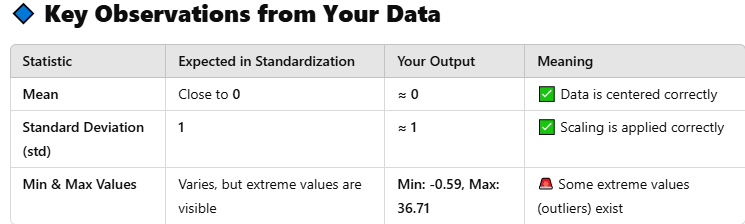

# 🌟✨ **MODEL BUILDING** ✨🌟

before starting we have to split the data in to two pats
training....80%
testing.....20%

**🔹 How train_test_split Works**
📌 It takes your dataset (X, y) and splits it into two parts:
1️⃣ Training Set (80%) → Used to train the model
2️⃣ Testing Set (20%) → Used to test how well the model predicts

📌 Why Do We Compare All Columns with isFraud?
✅ Yes! We compare all columns (features X) with isFraud (target y) because our goal is to find patterns that help predict fraud transactions.

In [ ]:
clean.head(1)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0.00,0.00


In [ ]:
print("Unique values in 'type':", clean['type'].unique())

# Step 2: Apply One-Hot Encoding to convert 'type' column
clean = pd.get_dummies(clean, columns=['type'])

# Step 3: Verify that new columns exist
print("Columns after encoding:", clean.columns)

# Step 4: Convert new one-hot encoded columns to integers
expected_cols = ['type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']

# If any expected column is missing, add it with default value 0
for col in expected_cols:
    if col not in clean.columns:
        clean[col] = 0

# Convert to integer type
clean[expected_cols] = clean[expected_cols].astype(int)

# Display first few rows
print(clean.head())

Unique values in 'type': ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
Columns after encoding: Index(['step', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT',
       'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')
   step   amount     nameOrig  oldbalanceOrg  newbalanceOrig     nameDest  \
0     1  9839.64  C1231006815      170136.00       160296.36  M1979787155   
1     1  1864.28  C1666544295       21249.00        19384.72  M2044282225   
2     1   181.00  C1305486145         181.00            0.00   C553264065   
3     1   181.00   C840083671         181.00            0.00    C38997010   
4     1 11668.14  C2048537720       41554.00        29885.86  M1230701703   

   oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  type_CASH_IN  \
0            0.00            0.00     0.00            0.00         False   
1          

In [ ]:
print(clean.dtypes)
print(clean.head())

step                int64
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           float64
isFlaggedFraud    float64
type_CASH_IN         bool
type_CASH_OUT       int64
type_DEBIT          int64
type_PAYMENT        int64
type_TRANSFER       int64
dtype: object
   step   amount     nameOrig  oldbalanceOrg  newbalanceOrig     nameDest  \
0     1  9839.64  C1231006815      170136.00       160296.36  M1979787155   
1     1  1864.28  C1666544295       21249.00        19384.72  M2044282225   
2     1   181.00  C1305486145         181.00            0.00   C553264065   
3     1   181.00   C840083671         181.00            0.00    C38997010   
4     1 11668.14  C2048537720       41554.00        29885.86  M1230701703   

   oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  type_CASH_IN  \
0            0.00            0.00     0.00            0.0

In [ ]:
expected_cols = ['type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']

# Convert type_CASH_IN from bool to int if necessary
if 'type_CASH_IN' in clean.columns and clean['type_CASH_IN'].dtype == 'bool':
    clean['type_CASH_IN'] = clean['type_CASH_IN'].astype(int)

# Verify if all expected columns exist, otherwise add them
for col in expected_cols:
    if col not in clean.columns:
        print(f"⚠ Warning: {col} not found! Creating it with default value 0.")
        clean[col] = 0

# Now safely convert to integer
clean[expected_cols] = clean[expected_cols].astype(int)

print(clean.dtypes)

step                int64
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           float64
isFlaggedFraud    float64
type_CASH_IN        int64
type_CASH_OUT       int64
type_DEBIT          int64
type_PAYMENT        int64
type_TRANSFER       int64
dtype: object


In [ ]:
clean.head(1)

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0.00,0.00,0,0,0,1,0


In [ ]:
clean[['type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']] = clean[['type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']].astype(int)
clean.head(1)

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0.00,0.00,0,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x=clean.drop(columns=['isFraud', 'nameOrig', 'nameDest'])
y=clean['isFraud']
print(x)
print(y)

        step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0          1   9839.64      170136.00       160296.36            0.00   
1          1   1864.28       21249.00        19384.72            0.00   
2          1    181.00         181.00            0.00            0.00   
3          1    181.00         181.00            0.00        21182.00   
4          1  11668.14       41554.00        29885.86            0.00   
...      ...       ...            ...             ...             ...   
165433    12   7724.77        2709.00         2709.00            0.00   
165434    12   4149.07           0.00            0.00            0.00   
165435    12  20934.94           0.00            0.00            0.00   
165436    12 122832.41       23958.00        23958.00        11507.00   
165437    12 424626.95       58972.00        58972.00            0.00   

        newbalanceDest  isFlaggedFraud  type_CASH_IN  type_CASH_OUT  \
0                 0.00            0.00             0

test_size=0.2 → 20% of the data is used for testing, 80% for training.
random_state=42 → Ensures the split is always the same every time you run the code.
X_train, y_train → Used for training the model.
X_test, y_test → Used for testing the model's accuracy.

In [ ]:


xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.2,random_state=42)

In [ ]:

print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

(31072, 12) (31072,)
(124288, 12) (124288,)


#testing set is large

In [ ]:
clean.shape

(155360, 15)

In [ ]:

xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=42)
print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)


(124288, 12) (124288,)
(31072, 12) (31072,)


check with different models acording to accuracy choose one model. now start with logistic regression

In [ ]:
clean.head(1)

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0.00,0.00,0,0,0,1,0


# T**rain a Logistic Regression Model**
✅ Import & Initialize the model
✅ Train it on the training set (X_train, y_train)
✅ Make predictions on the test set (X_test)
✅ Check accuracy & performance



In [ ]:
from sklearn.linear_model import LogisticRegression#importing
lr=LogisticRegression(max_iter=1000)#intializing
lr.fit(xtrain,ytrain)#training the model

LogisticRegression(max_iter=1000)

training

In [ ]:
xpred = lr.predict(xtest)
accuracy = accuracy_score(ytest, xpred)
print(f"{accuracy:.4f}")

0.9994


1️⃣ Check for Overfitting or Underfitting
📌 Compare Training vs. Testing Accuracy:

If Training Accuracy ≫ Testing Accuracy, then Overfitting is happening.
If both are close, then your model is good.

In [ ]:
trainacc=lr.score(xtrain,ytrain)
testacc=lr.score(xtest,ytest)
print(trainacc)
print(testacc)

0.9994448377960865
0.9994207003089598


1️⃣ Check Precision, Recall & F1-Score (Not Just Accuracy)
📌 Accuracy alone is misleading for fraud detection!
✅ Use this to see how well the model detects fraud cases:

In [ ]:
from sklearn.metrics import classification_report

y_pred = lr.predict(xtest)
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     31050
         1.0       1.00      0.18      0.31        22

    accuracy                           1.00     31072
   macro avg       1.00      0.59      0.65     31072
weighted avg       1.00      1.00      1.00     31072



above model is not suitable

# ** RANDOM FOREST🚀**

✅ It creates multiple decision trees and takes the majority prediction.
✅ It works better for imbalanced data (like fraud detection).
✅ It can detect patterns better than Logistic Regression.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf=RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
#n_esti:no of decision tress
rf.fit(xtrain,ytrain)#training


RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:

xpred = rf.predict(xtest)#testing
accuracy = accuracy_score(ytest, xpred)
print(f"{accuracy:.4f}")
print(xpred)
row = clean[clean['amount'] == 9839.64]
if not row.empty:
    X_test_sample = row[x.columns]  # Extract all required features
    prediction = rf.predict(X_test_sample)  # Predict fraud or not
    print(1 if prediction[0] == 1 else 0)
else:
    print("Amount 9839 not found in dataset.")
fraud_count = np.sum(xpred == 1)
non_fraud_count = np.sum(xpred == 0)
print(fraud_count)
print(non_fraud_count)


0.9999
[0. 0. 0. ... 0. 0. 0.]
0
20
31052


In [ ]:

clean.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
count,155360.00,155360.00,155360.00,155360.00,155360.00,155360.00,155360.00,155360.00,155360.00,155360.00,155360.00,155360.00,155360.00
mean,9.54,113904.98,925573.11,894357.09,826647.46,917403.24,0.00,0.00,0.21,0.34,0.01,0.40,0.04
std,1.98,132518.10,2874780.42,2840518.34,2233903.78,2320820.71,0.03,0.00,0.41,0.47,0.10,0.49,0.19
min,1.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,9.00,10497.86,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,10.00,48021.74,20044.00,14315.93,21173.00,88393.24,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,11.00,189284.32,202483.61,162884.97,604137.82,758792.49,0.00,0.00,0.00,1.00,0.00,1.00,0.00
max,12.00,544977.60,38939424.03,38932615.04,38946233.02,39039582.05,1.00,0.00,1.00,1.00,1.00,1.00,1.00


In [ ]:
testacc = accuracy_score(ytest, rf.predict(xtest))
print(testacc)


0.9999356333676622


In [ ]:
print(classification_report(ytest, xpred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     31050
         1.0       1.00      0.91      0.95        22

    accuracy                           1.00     31072
   macro avg       1.00      0.95      0.98     31072
weighted avg       1.00      1.00      1.00     31072



# 🚀 ROC Curve (Receiver Operating Characteristic Curve)
✅ The ROC Curve helps us measure how well the model distinguishes between fraud (1) and non-fraud (0).
✅ It is a graph that shows the trade-off between sensitivity (recall) and false positives.
✅ The key metric from this curve is the AUC (Area Under the Curve) Score, which tells us the model’s overall ability to detect fraud.



**X-axis:** False Positive Rate (FPR) → How many normal transactions were wrongly predicted as fraud.
**Y-axis:** True Positive Rate (TPR) (Recall) → How many actual fraud cases were correctly detected.
A perfect model would have an AUC score close to 1.0 (meaning it separates fraud from non-fraud perfectly).


In [ ]:
from sklearn.metrics import roc_curve, auc

✅ Why?

roc_curve() → Creates the ROC Curve.
auc() → Calculates the AUC Score.

In [ ]:
#fraud detections
xprob = rf.predict_proba(xtest)[:, 1]

predict_proba() gives the probability of fraud (1) and non-fraud (0).
[:, 1] selects only fraud probabilities (not non-fraud).

In [ ]:

#🔍 Step 3: Compute ROC Curve
fpr, tpr, _ = roc_curve(ytest, xprob)
aucscore = auc(fpr, tpr)

✅ Why?

fpr (False Positive Rate) → How many non-fraud transactions were wrongly detected as fraud?
tpr (True Positive Rate) → How many actual frauds were detected correctly?
auc_score → The final AUC Score (how good the model is).

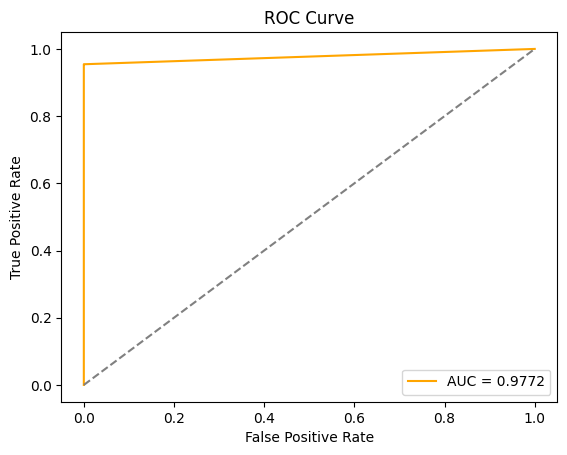

In [ ]:

plt.plot(fpr, tpr, label=f"AUC = {aucscore:.4f}", color='orange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# **📌 What is a Decision Tree?**

A Decision Tree is a model that mimics human decision-making by splitting data into smaller and smaller parts based on conditions.

Think of it like a flowchart you use when making a decision.

In [ ]:
from sklearn.tree import  DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [ ]:
xpred=dt.predict(xtest)
accuracy=accuracy_score(ytest,xpred)
print(xpred)
print(f"{accuracy:.4f}")

[0. 0. 0. ... 0. 0. 0.]
0.9998


check for overfittiing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [ ]:
trainacc=dt.score(xtrain,ytrain)
testacc=dt.score(xtest,ytest)
print(trainacc)
print(testacc)

1.0
0.9998390834191555


In [ ]:
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
dt = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

In [ ]:
clean.head(1)

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0.00,0.00,0,0,0,1,0


In [ ]:

x.head(1)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,0.00,0,0,0,1,0


In [ ]:
try:
    dt.fit(xtrain, ytrain)
except Exception as e:
    print(f"Error during training: {e}")

In [ ]:
print(type(xtrain), xtrain.shape)
print(type(ytrain), ytrain.shape)

<class 'pandas.core.frame.DataFrame'> (124288, 12)
<class 'pandas.core.series.Series'> (124288,)


In [ ]:
sample_df = pd.DataFrame([[1, 9839.64, 170136.00, 160296.36, 0, 0, 0, 0, 0, 0, 1, 0]],
                         columns=xtrain.columns)

prediction = dt.predict(sample_df)
print(prediction)

[0.]


In [ ]:
df.head(3)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0.00,0.00
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0.00,0.00
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,181.00,1.00,0.00


In [ ]:
x.head(1)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,0.00,0,0,0,1,0


In [ ]:
sample_df = pd.DataFrame([[1, 181.00, 181.00, 0.00, 0.00, 181.00, 0, 0, 0, 0, 0, 1]],
                         columns=xtrain.columns)
print(dt.predict(sample_df))

[1.]


In [ ]:
sample_df = pd.DataFrame([[1, 181.00, 181.00, 0.00, 21182.00, 21363.00, 0, 1, 0, 0, 0, 1]],
                         columns=xtrain.columns)
print(dt.predict(sample_df))


[1.]


In [ ]:
sample_df = pd.DataFrame([[1, 20128.00, 20128.00, 0.00, 0.00, 20128.00, 0, 0, 0, 0, 0, 1]],
                         columns=xtrain.columns)
print(dt.predict(sample_df))


[1.]


In [ ]:
check = df[df['isFraud'] == 1]
print(check.head(10))

      step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
2        1  TRANSFER     181.00  C1305486145         181.00            0.00   
3        1  CASH_OUT     181.00   C840083671         181.00            0.00   
251      1  TRANSFER    2806.00  C1420196421        2806.00            0.00   
252      1  CASH_OUT    2806.00  C2101527076        2806.00            0.00   
680      1  TRANSFER   20128.00   C137533655       20128.00            0.00   
681      1  CASH_OUT   20128.00  C1118430673       20128.00            0.00   
724      1  CASH_OUT  416001.33   C749981943           0.00            0.00   
969      1  TRANSFER 1277212.77  C1334405552     1277212.77            0.00   
970      1  CASH_OUT 1277212.77   C467632528     1277212.77            0.00   
1115     1  TRANSFER   35063.63  C1364127192       35063.63            0.00   

         nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
2      C553264065            0.00          181.00    

In [ ]:
x.head(1)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,0.00,0,0,0,1,0


In [ ]:
sample_df = pd.DataFrame([[1, 20128.00, 20128.00, 0.00, 6268.00,26396.00, 0.00, 0, 1, 0, 0, 0]],
                         columns=xtrain.columns)
print(dt.predict(sample_df))

[1.]


In [ ]:
sample_df = pd.DataFrame([[1, 416001.33, 0.00, 0.00, 102.00,416103.33, 0.00, 0, 1, 0, 0, 0]],
                         columns=xtrain.columns)
print(dt.predict(sample_df))

[1.]


In [ ]:
sample_df = pd.DataFrame([[1, 1277212.77, 1277212.77, 0.00, 0.00,1277212.77, 0.00, 0, 0, 0, 0, 1]],
                         columns=xtrain.columns)
print(dt.predict(sample_df))

[1.]


In [ ]:
sample_df = pd.DataFrame([[1, 35063.63,35063.63, 0.00,0.00,35063.63, 0.00, 0, 0, 0, 0, 1]],
                         columns=xtrain.columns)
print(dt.predict(sample_df))

[1.]


In [ ]:
sample_df = pd.DataFrame([[1, 1277212.77, 1277212.77, 0.00, 0.00,1277212.77, 0.00, 0, 1, 0, 0, 0]],
                         columns=xtrain.columns)
print(dt.predict(sample_df))

[1.]


In [ ]:
sample_df = pd.DataFrame([[1,416001.33, 0.00, 0.00, 102.00,416103.33, 0.00, 0, 1, 0, 0, 0]],
                         columns=xtrain.columns)
print(dt.predict(sample_df))

[1.]


In [ ]:
sample_df = pd.DataFrame([[1, 1277212.77, 1277212.77, 0.00, 0.00,1277212.77, 0.00, 0, 1, 0, 0, 0]],
                         columns=xtrain.columns)
print(dt.predict(sample_df))

[1.]


In [ ]:
#convert into pickle
#notebook lo download cheyali chesi convert chesi app.py lo varaible lo store cheyali
#


In [ ]:
import pickle
with open("model.pkl", "wb") as f:
    pickle.dump(dt, f)

print("Model saved to model.pkl")


Model saved to model.pkl
